### Pre-fixed stimulus selective encoders (without learning)

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo
import nengo.spa as spa

In [48]:
D = 16
vocab = spa.Vocabulary(D)

A = vocab.parse('A').v
B = vocab.parse('B').v

rate_A = 0.8
rate_B = 1.0 - rate_A

N = 1000
inputs = np.zeros((N, D)) + A
inputs[int(N*rate_A):] = B

np.random.shuffle(inputs)


t_present = 0.1

model = nengo.Network()
with model: 
    # the actual stimulus we're seeing right now
    stim = nengo.Node(lambda t: inputs[int(t/t_present) % N])
    
    # set encoders in the direction of stimuli 
    eA = np.zeros((int(np.ceil(rate_B*100)), 1)) + A
    eB = np.zeros((int(np.ceil(rate_A*100)), 1)) + B
    e = np.concatenate((eA, eB), axis=0)
    np.random.shuffle(e)

    # ensemble with weights (encoders) learned from previous experience.
    # (we could learn this using the voja learning rule, 
    # but this is outside the scope of the current model)
    sensory = nengo.Ensemble(n_neurons=100, dimensions=D, encoders=e)
    nengo.Connection(stim, sensory)
  
    p_stim = nengo.Probe(stim)
    p_sensory = nengo.Probe(sensory)
    p_sensory_neurons = nengo.Probe(sensory.neurons)
    
sim = nengo.Simulator(model)
with sim:
    sim.run(2)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

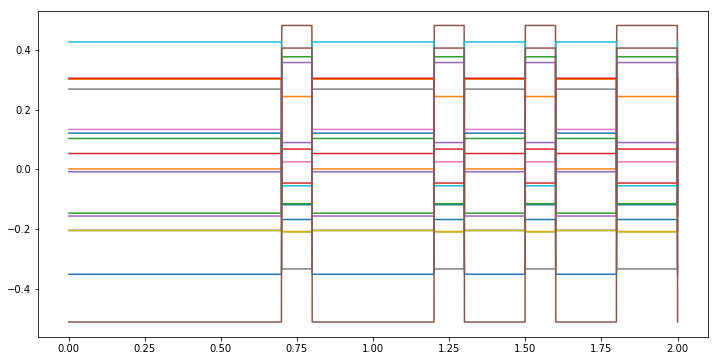

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(sim.trange(), sim.data[p_stim])
plt.show()

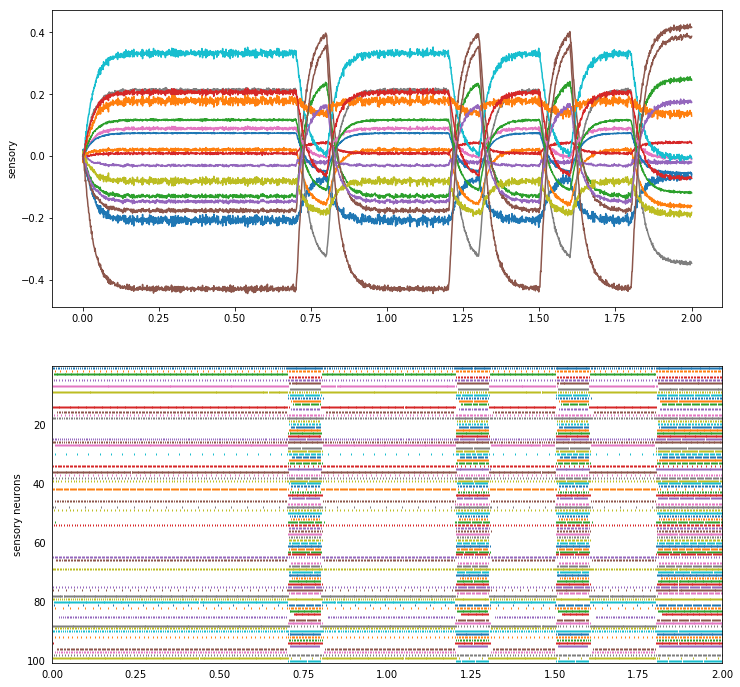

In [50]:
import nengo.utils.matplotlib
plt.figure(figsize=(12, 12))
syn = nengo.synapses.Lowpass(0.03)

plt.subplot(2, 1, 1)
plt.plot(sim.trange(), syn.filt(sim.data[p_sensory]))
plt.ylabel('sensory')
plt.subplot(2, 1, 2)

plt.ylabel('sensory neurons')
nengo.utils.matplotlib.rasterplot(sim.trange(), sim.data[p_sensory_neurons])

In [ ]:
import nengo_gui.ipython
nengo_gui.ipython.IPythonViz(model, 'encoders.cfg')